# 📊 Data Cleansing: Complete Notes

## ✅ What is Data Cleansing?

**Data Cleansing** (also known as Data Cleaning or Data Scrubbing) is the process of identifying and correcting (or removing) errors and inconsistencies in data to improve its quality.

Bad data = Poor decisions. Clean data = Reliable models and accurate results.

---

## 🧼 Why is Data Cleansing Important?

- Removes **duplicate**, **incomplete**, or **inaccurate** records
- Improves **data consistency and reliability**
- Enhances **model performance** in ML/AI
- Prevents **biased insights** in analytics

---

## 🔍 Common Issues in Raw Data

| Issue               | Example                          |
|---------------------|----------------------------------|
| Missing values       | NaN, Null                        |
| Duplicates           | Same row appearing multiple times |
| Inconsistent formats | "USA", "U.S.", "United States"  |
| Outliers             | Age = 200                        |
| Typos/Spelling errors| "Color", "Colour", "colr"        |
| Wrong data types     | Date stored as string            |
| Noise                | Random or meaningless data       |

---

## 🛠️ Major Data Cleansing Methods

### 1. **Handling Missing Values**

#### 🔸 Methods:
- `Drop missing`: `df.dropna()`
- `Fill with mean/median/mode`: `df.fillna(df['col'].mean())`
- `Forward fill`: `df.ffill()`
- `Backward fill`: `df.bfill()`
- `Interpolate`: `df.interpolate()`
- `Predictive imputation` using ML models

#### 🔹 When to Use:
| Method | Use When |
|--------|----------|
| Drop | Data is huge and missing rows are few |
| Mean/Median | Data is numeric and missing values are random |
| Mode | Categorical data |
| ffill/bfill | Time-series data with continuity |
| Interpolation | Data is sequential (e.g., sensor data) |
| Predictive | For sensitive models like healthcare, finance |

---

### 2. **Removing Duplicates**

```python
df.drop_duplicates()
Removes repeated rows.

Especially useful for log data, scraped data, etc.

3. Fixing Inconsistent Formatting
Convert all text to lowercase: df['col'] = df['col'].str.lower()

Strip whitespace: df['col'] = df['col'].str.strip()

Replace formats: df['col'].replace({'U.S.': 'USA'})

Use for:

Standardizing categories (e.g., country names, gender labels)

Preparing for grouping, analysis

4. Correcting Data Types
Use: df.astype(), pd.to_datetime()

Strings to dates

Float to integer

Object to category (for memory optimization)

5. Outlier Detection and Treatment
Techniques:
Z-score: (x - mean)/std > threshold (usually 3)

IQR Method: Remove values outside Q1 - 1.5*IQR or Q3 + 1.5*IQR

Boxplots: Visual method

Domain knowledge: E.g., Human age > 120 is outlier

What to do:
Remove

Cap (clipping to limits)

Impute (replace with mean/median)

Use log/square root transformation

6. Standardization and Normalization
Use when features are on different scales (e.g., income in crores, age in years)

Methods:
MinMaxScaler: Scales between 0-1

StandardScaler: Mean = 0, Std = 1

RobustScaler: Uses median & IQR (good for outliers)

Use before:

Distance-based models (KNN, KMeans, SVM)

7. Encoding Categorical Values
Method	Best For
Label Encoding	Ordinal data (e.g., Low < Medium < High)
One-Hot Encoding	Nominal data (e.g., color, gender)
Binary Encoding	High-cardinality data
Target Encoding	When data is huge + categorical column affects output

python
Copy
Edit
from sklearn.preprocessing import OneHotEncoder
8. Text Cleaning (for NLP)
Remove punctuation/special characters

Lowercase conversion

Remove stopwords

Lemmatization/Stemming

💡 When to Use What?
Problem	Best Method	Why
Few missing values	Drop	Won’t harm overall data
Many missing	Impute	Keeps data size and patterns
Typos in categorical	Mapping or fuzzy match	Auto-correct errors
Outliers in numeric	IQR/Log Transform	Smooth effect
High-cardinality categorical	Binary/Target Encoding	Saves memory & improves model

🧠 Pro Tip:
Always visualize before cleaning — use:

python
Copy
Edit
df.info()
df.describe()
df.isnull().sum()
sns.heatmap(df.isnull())
sns.boxplot(df['col'])
📦 Summary
Data cleansing is not just preprocessing — it’s data quality assurance. A clean dataset:

Reduces model bias

Increases trust in output

Saves time in debugging



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"D:\Data Science\Datasets\ev.csv")
df.head(5)

In [42]:
df.isnull().sum()

region        0
category      0
parameter     0
mode          0
powertrain    0
year          1
unit          1
value         1
dtype: int64

* To know how much percentage of data is na

In [45]:
# in each each column
(df.isnull().sum()/df.shape[0])*100

region        0.00000
category      0.00000
parameter     0.00000
mode          0.00000
powertrain    0.00000
year          0.17452
unit          0.17452
value         0.17452
dtype: float64

In [46]:
# in entire dataset
(df.isnull().sum().sum()/df.shape[0]*df.shape[1])*100

4.18848167539267

In [47]:
# for not null
df.notnull().sum()

region        573
category      573
parameter     573
mode          573
powertrain    573
year          572
unit          572
value         572
dtype: int64

<Axes: >

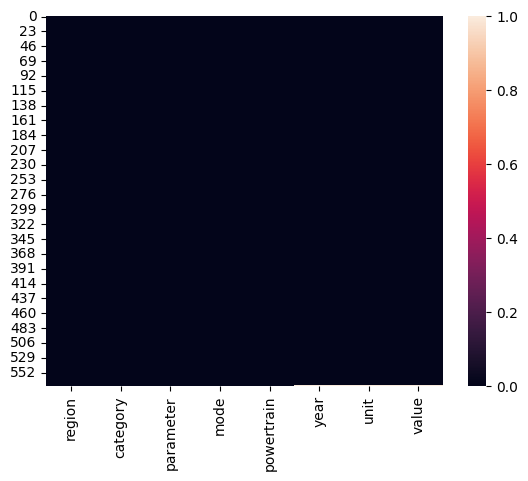

In [50]:
sns.heatmap(df.isnull())

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'region'),
  Text(1, 0, 'category'),
  Text(2, 0, 'parameter'),
  Text(3, 0, 'mode'),
  Text(4, 0, 'powertrain'),
  Text(5, 0, 'year'),
  Text(6, 0, 'unit'),
  Text(7, 0, 'value')])

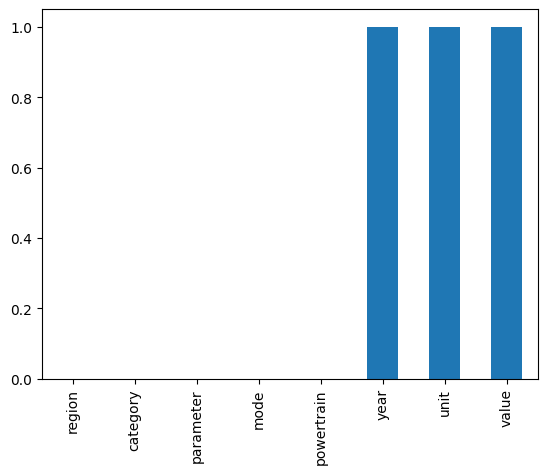

In [67]:
null_count = df.isnull().sum()
null_count.plot(kind='bar')
plt.xticks(rotation=90)

# Handling Missing data

* We can drop the entire row in which contain na

In [68]:
df.shape

(573, 8)

In [43]:
df.dropna()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011.0,Vehicles,49.00000
1,Australia,Historical,EV stock share,Cars,EV,2011.0,percent,0.00039
2,Australia,Historical,EV sales share,Cars,EV,2011.0,percent,0.00650
3,Australia,Historical,EV stock,Cars,BEV,2011.0,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012.0,Vehicles,220.00000
...,...,...,...,...,...,...,...,...
567,China,Historical,EV sales,Cars,BEV,2011.0,Vehicles,4800.00000
568,China,Historical,EV sales,Cars,PHEV,2011.0,Vehicles,320.00000
569,China,Historical,EV sales,Cars,PHEV,2012.0,Vehicles,260.00000
570,China,Historical,EV sales,Cars,BEV,2012.0,Vehicles,9600.00000


For columns which has categorical value

In [ ]:
df = pd.read_csv(r"D:\Data Science\Datasets\ev.csv")

In [69]:
df.isnull().sum()

region        0
category      0
parameter     0
mode          0
powertrain    0
year          1
unit          1
value         1
dtype: int64

In [71]:
df.describe()

,year,value
count,572.000000,572.000000
mean,2017.225524,10122.122584
std,3.885378,33753.418404
min,2010.000000,0.000029
25%,2014.000000,1.700000
50%,2017.000000,68.000000
75%,2021.000000,2425.000000
max,2023.000000,380000.000000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      573 non-null    object 
 1   category    573 non-null    object 
 2   parameter   573 non-null    object 
 3   mode        573 non-null    object 
 4   powertrain  573 non-null    object 
 5   year        572 non-null    float64
 6   unit        572 non-null    object 
 7   value       572 non-null    float64
dtypes: float64(2), object(6)
memory usage: 35.9+ KB


In [74]:
# forward fill i.e top data will be feeded forward
df['year'].ffill()

0      2011.0
1      2011.0
2      2011.0
3      2011.0
4      2012.0
        ...  
568    2011.0
569    2012.0
570    2012.0
571    2012.0
572    2012.0
Name: year, Length: 573, dtype: float64

In [75]:
df['year'].bfill()

0      2011.0
1      2011.0
2      2011.0
3      2011.0
4      2012.0
        ...  
568    2011.0
569    2012.0
570    2012.0
571    2012.0
572       NaN
Name: year, Length: 573, dtype: float64

In [76]:
# filling most frequent value into the blank
df['unit'].fillna(df['unit'].mode()[0])

0      Vehicles
1       percent
2       percent
3      Vehicles
4      Vehicles
         ...   
568    Vehicles
569    Vehicles
570    Vehicles
571    Vehicles
572    Vehicles
Name: unit, Length: 573, dtype: object

In [78]:
df.select_dtypes(include='object')

,region,category,parameter,mode,powertrain,unit
0,Australia,Historical,EV sales,Cars,BEV,Vehicles
1,Australia,Historical,EV stock share,Cars,EV,percent
2,Australia,Historical,EV sales share,Cars,EV,percent
3,Australia,Historical,EV stock,Cars,BEV,Vehicles
4,Australia,Historical,EV stock,Cars,BEV,Vehicles
...,...,...,...,...,...,...
568,China,Historical,EV sales,Cars,PHEV,Vehicles
569,China,Historical,EV sales,Cars,PHEV,Vehicles
570,China,Historical,EV sales,Cars,BEV,Vehicles
571,China,Historical,EV stock,Cars,BEV,Vehicles


# Through Scikitlearn

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      573 non-null    object 
 1   category    573 non-null    object 
 2   parameter   573 non-null    object 
 3   mode        573 non-null    object 
 4   powertrain  573 non-null    object 
 5   year        572 non-null    float64
 6   unit        572 non-null    object 
 7   value       572 non-null    float64
dtypes: float64(2), object(6)
memory usage: 35.9+ KB


In [84]:
df.select_dtypes(include='float64').columns

Index(['year', 'value'], dtype='object')

In [85]:
# for using scikit learn, we need call lybraries of it
from sklearn.impute import SimpleImputer

In [88]:
# press tab + shift then read all, and call what you want
si = SimpleImputer(strategy = 'mean')

In [92]:
si.fit_transform(df[['year', 'value']])

array([[2.01100000e+03, 4.90000000e+01],
       [2.01100000e+03, 3.90000001e-04],
       [2.01100000e+03, 6.50000013e-03],
       ...,
       [2.01200000e+03, 9.60000000e+03],
       [2.01200000e+03, 1.60000000e+04],
       [2.01722552e+03, 1.01221226e+04]])

Now we have fill the mean values and the result is in the array, we need to convert that into an arrays

In [94]:
ar = si.fit_transform(df[['year', 'value']])

In [100]:
data = pd.DataFrame(ar, columns = df.select_dtypes(include='float64').columns)
data

,year,value
0,2011.000000,49.000000
1,2011.000000,0.000390
2,2011.000000,0.006500
3,2011.000000,49.000000
4,2012.000000,220.000000
...,...,...
568,2011.000000,320.000000
569,2012.000000,260.000000
570,2012.000000,9600.000000
571,2012.000000,16000.000000


In [101]:
data.isnull().sum()

year     0
value    0
dtype: int64

The above process is used when we are deploying ml pipline where in the new data should autometically be filled (where traditional method of fillna wont work